In [1]:
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("https://github.com/dssg/aequitas/raw/master/examples/data/compas_for_aequitas.csv")
df.head()

,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45


In [4]:

df.shape

(7214, 6)

In [5]:
aq_palette = sns.diverging_palette(225, 35, n=2)

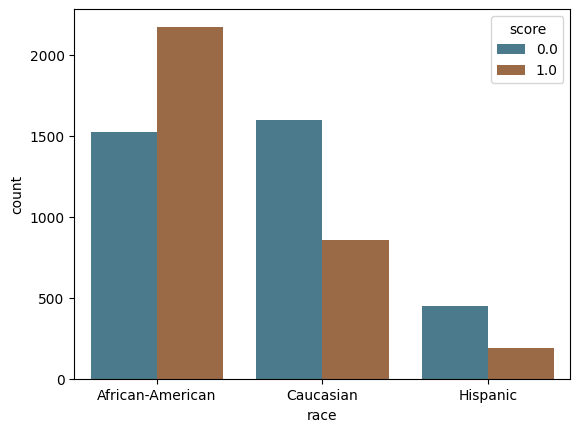

In [6]:
by_race = sns.countplot(x="race", hue="score", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)


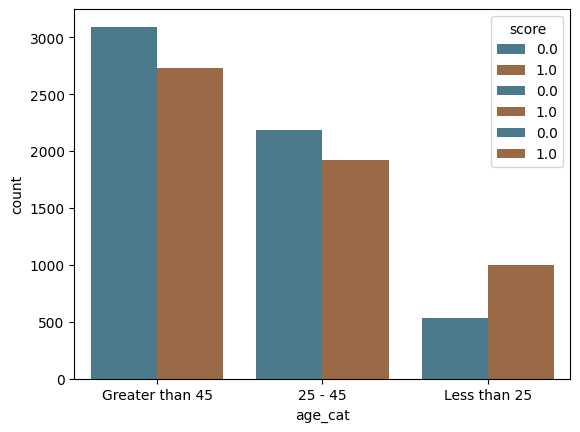

In [10]:
by_race = sns.countplot(x="race", hue="score", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)
by_sex = sns.countplot(x="sex", hue="score", data=df, palette=aq_palette)
by_age = sns.countplot(x="age_cat", hue="score", data=df, palette=aq_palette)

In [11]:
g = Group()
xtab, _ = g.get_crosstabs(df)

In [12]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [13]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,3317,race,African-American,2174,1522,805,532,990,1369,1901,1795,3696,7214
1,0,binary 0/1,3317,race,Asian,8,24,2,3,21,6,9,23,32,7214
2,0,binary 0/1,3317,race,Caucasian,854,1600,349,461,1139,505,966,1488,2454,7214
3,0,binary 0/1,3317,race,Hispanic,190,447,87,129,318,103,232,405,637,7214
4,0,binary 0/1,3317,race,Native American,12,6,3,1,5,9,10,8,18,7214
5,0,binary 0/1,3317,race,Other,79,298,36,90,208,43,133,244,377,7214
6,0,binary 0/1,3317,sex,Female,591,804,288,195,609,303,498,897,1395,7214
7,0,binary 0/1,3317,sex,Male,2726,3093,994,1021,2072,1732,2753,3066,5819,7214
8,0,binary 0/1,3317,age_cat,25 - 45,1924,2185,741,706,1479,1183,1889,2220,4109,7214
9,0,binary 0/1,3317,age_cat,Greater than 45,394,1182,181,285,897,213,498,1078,1576,7214


In [14]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)


,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,African-American,0.72,0.55,0.35,0.37,0.45,0.28,0.65,0.63,0.66,0.59,0.51
1,race,Asian,0.67,0.91,0.12,0.25,0.09,0.33,0.88,0.75,0.00,0.25,0.28
2,race,Caucasian,0.52,0.77,0.29,0.41,0.23,0.48,0.71,0.59,0.26,0.35,0.39
3,race,Hispanic,0.44,0.79,0.29,0.46,0.21,0.56,0.71,0.54,0.06,0.30,0.36
4,race,Native American,0.90,0.62,0.17,0.25,0.38,0.10,0.83,0.75,0.00,0.67,0.56
5,race,Other,0.32,0.85,0.30,0.46,0.15,0.68,0.70,0.54,0.02,0.21,0.35
6,sex,Female,0.61,0.68,0.24,0.49,0.32,0.39,0.76,0.51,0.18,0.42,0.36
7,sex,Male,0.63,0.68,0.33,0.36,0.32,0.37,0.67,0.64,0.82,0.47,0.47
8,age_cat,25 - 45,0.63,0.67,0.32,0.39,0.33,0.37,0.68,0.61,0.58,0.47,0.46
9,age_cat,Greater than 45,0.43,0.83,0.24,0.46,0.17,0.57,0.76,0.54,0.12,0.25,0.32


In [15]:
aqp = Plot()


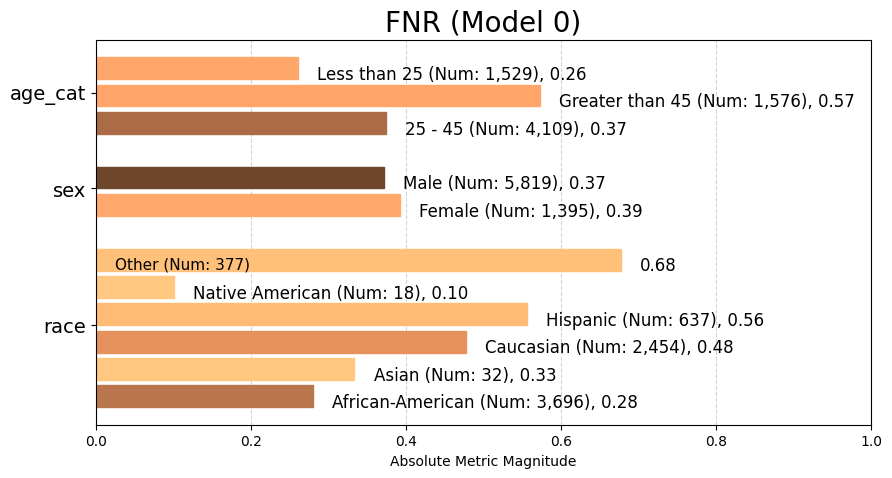

In [16]:
fnr = aqp.plot_group_metric(xtab, 'fnr')


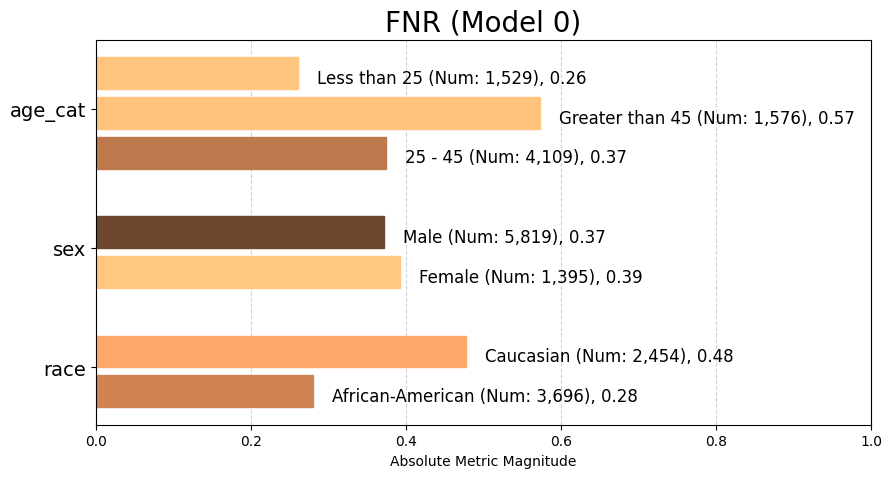

In [17]:
fnr = aqp.plot_group_metric(xtab, 'fnr', min_group_size=0.05)


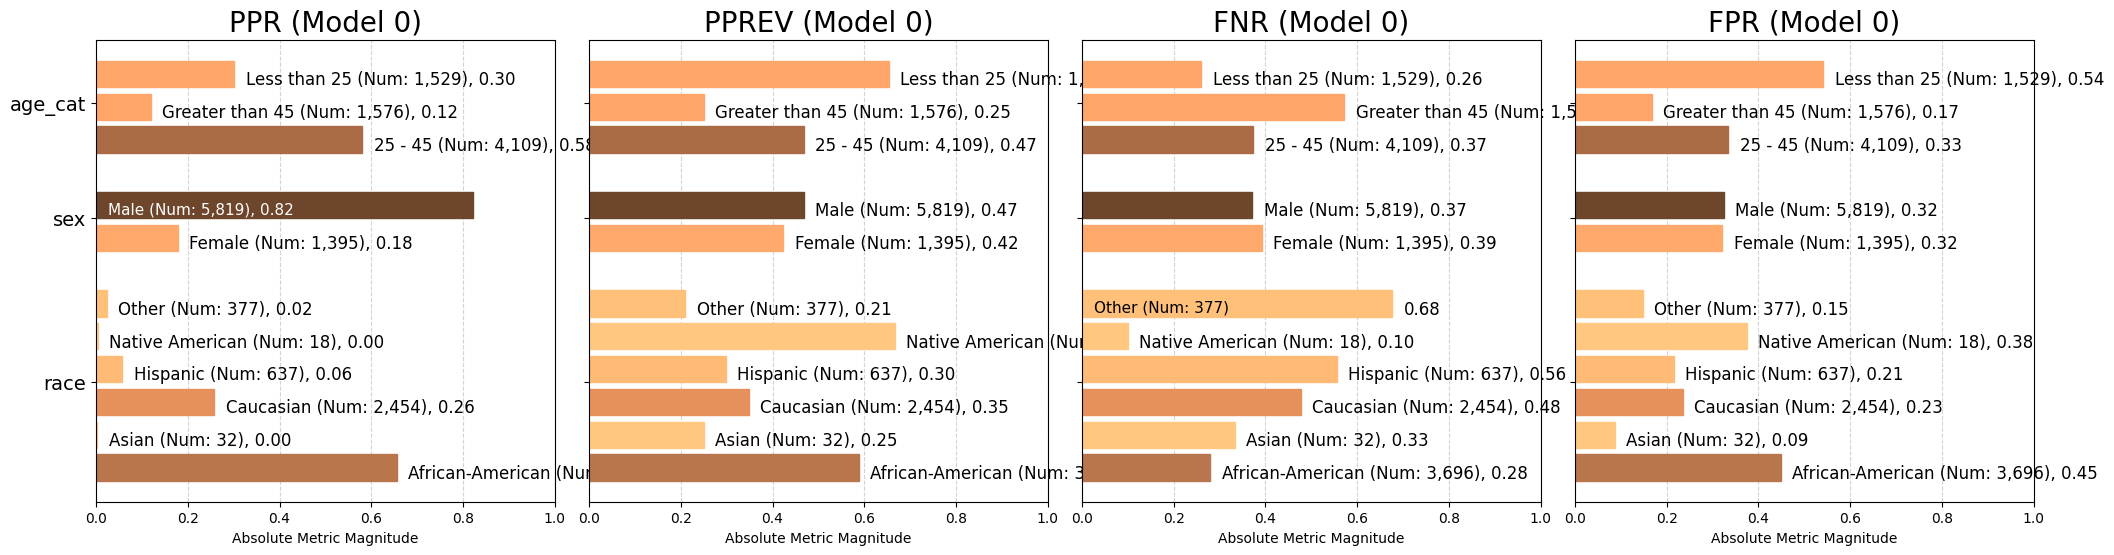

<Figure size 640x480 with 0 Axes>

In [18]:
p = aqp.plot_group_metric_all(xtab, metrics=['ppr','pprev','fnr','fpr'], ncols=4)


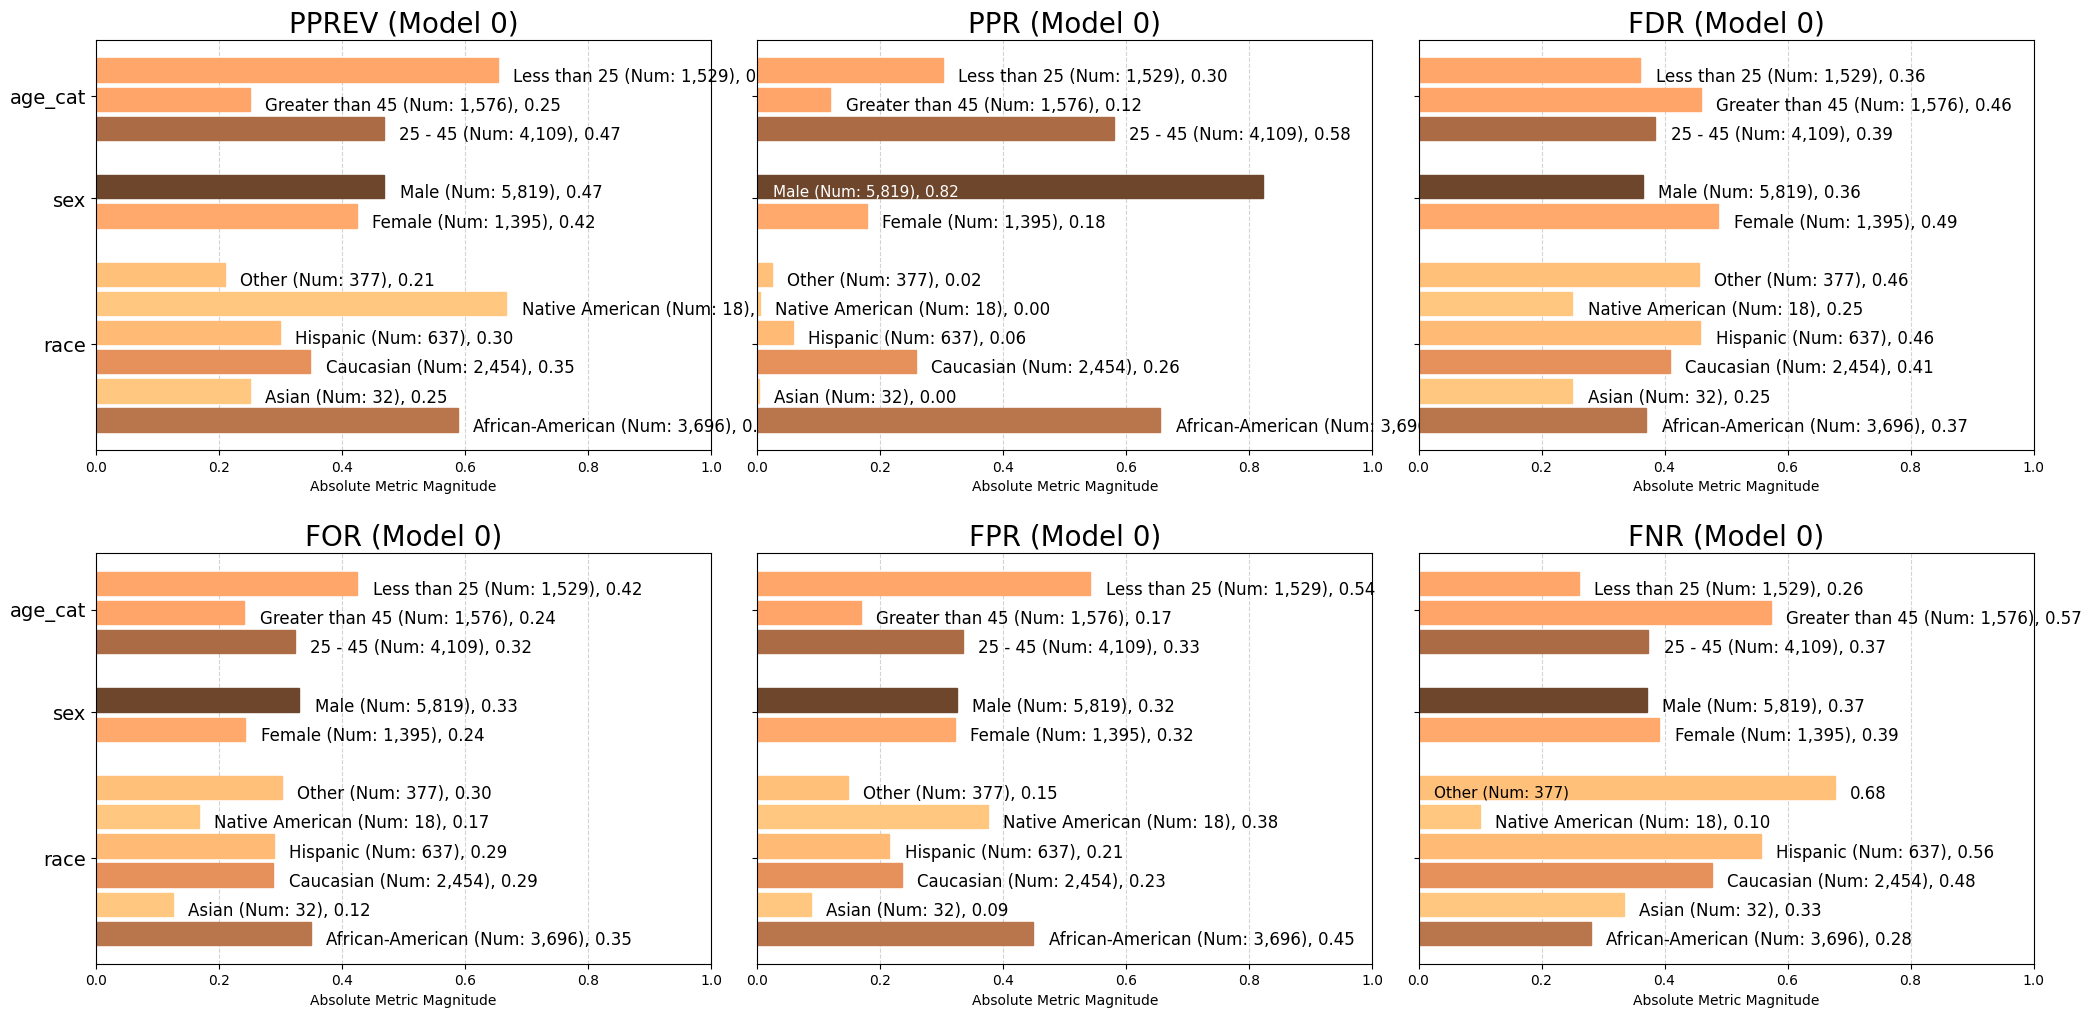

<Figure size 640x480 with 0 Axes>

In [19]:
a = aqp.plot_group_metric_all(xtab, ncols=3)


In [20]:
b = Bias()

In [21]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'}, alpha=0.05, mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,3317,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,2.545667,1.690224,1.064904,0.906085,1.213154,1.912093,0.586416,1.377549,0.720526,0.913728,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
1,0,binary 0/1,3317,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,0.009368,0.718384,1.268317,0.611748,0.433839,0.370749,0.698482,1.275248,1.192808,1.229148,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
2,0,binary 0/1,3317,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
3,0,binary 0/1,3317,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,0.222482,0.857099,0.916748,1.120464,1.001616,0.915887,1.165140,0.849249,1.025773,0.999346,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
4,0,binary 0/1,3317,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,0.014052,1.915691,1.268317,0.611748,0.578453,1.598854,0.209544,1.721584,0.816506,1.170618,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
5,0,binary 0/1,3317,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,0.092506,0.602147,0.920466,1.115085,1.048203,0.629057,1.417970,0.618447,1.113660,0.980490,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
6,0,binary 0/1,3317,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
7,0,binary 0/1,3317,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
8,0,binary 0/1,3317,age_cat,25 - 45,0.626257,0.666216,0.323112,0.385135,0.333784,0.373743,0.676888,0.614865,1924,2185,0.580042,0.468240,741,706,1479,1183,1889,2220,4109,7214,0.459723,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45
9,0,binary 0/1,3317,age_cat,Greater than 45,0.427711,0.832096,0.241117,0.459391,0.167904,0.572289,0.758883,0.540609,394,1182,0.118782,0.250000,181,285,897,213,498,1078,1576,7214,0.315990,0.204782,0.533914,0.879232,1.192804,0.746232,0.503031,1.531238,0.682963,1.248989,1.121136,25 - 45,25 - 45,25 - 45,25 

In [23]:
calculated_disparities = b.list_disparities(bdf)
disparity_significance = b.list_significance(bdf)

In [24]:

disparity_significance

[]

In [25]:
# View disparity metrics added to dataframe
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,race,African-American,2.545667,1.690224,1.064904,0.906085,1.213154,1.912093,0.586416,1.377549,0.720526,0.913728
1,race,Asian,0.009368,0.718384,1.268317,0.611748,0.433839,0.370749,0.698482,1.275248,1.192808,1.229148
2,race,Caucasian,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,race,Hispanic,0.222482,0.857099,0.916748,1.120464,1.001616,0.915887,1.165140,0.849249,1.025773,0.999346
4,race,Native American,0.014052,1.915691,1.268317,0.611748,0.578453,1.598854,0.209544,1.721584,0.816506,1.170618
5,race,Other,0.092506,0.602147,0.920466,1.115085,1.048203,0.629057,1.417970,0.618447,1.113660,0.980490
6,sex,Female,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710
7,sex,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,age_cat,25 - 45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,age_cat,Greater than 45,0.204782,0.533914,0.879232,1.192804,0.746232,0.503031,1.531238,0.682963,1.248989,1.121136


In [26]:

hbdf = b.get_disparity_predefined_groups(xtab, original_df=df,
                                         ref_groups_dict={'race':'Hispanic', 'sex':'Male', 'age_cat':'25 - 45'},
                                         alpha=0.05,
                                         mask_significance=False)

get_disparity_predefined_group()


In [27]:
# View disparity metrics added to dataframe
hbdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,race,African-American,11.442105,1.972030,1.161610,0.808669,1.211197,2.087696,0.503301,1.622079,0.702423,0.914326
1,race,Asian,0.042105,0.838158,1.383495,0.545977,0.433140,0.404798,0.599483,1.501618,1.162838,1.229953
2,race,Caucasian,4.494737,1.166727,1.090812,0.892487,0.998387,1.091838,0.858266,1.177511,0.974874,1.000654
3,race,Hispanic,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,race,Native American,0.063158,2.235088,1.383495,0.545977,0.577519,1.745690,0.179845,2.027184,0.795991,1.171384
5,race,Other,0.415789,0.702541,1.004056,0.995199,1.046512,0.686829,1.216996,0.728228,1.085679,0.981132
6,sex,Female,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710
7,sex,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,age_cat,25 - 45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,age_cat,Greater than 45,0.204782,0.533914,0.879232,1.192804,0.746232,0.503031,1.531238,0.682963,1.248989,1.121136


In [28]:
majority_bdf = b.get_disparity_major_group(xtab, original_df=df, mask_significance=True)


get_disparity_major_group()


In [29]:
majority_bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,race,African-American,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,race,Asian,0.003680,0.425023,1.191015,0.675155,0.357613,0.193897,1.191103,0.925737,1.655468,1.345202
2,race,Caucasian,0.392824,0.591638,0.939052,1.103650,0.824297,0.522987,1.705274,0.725927,1.387874,1.094418
3,race,Hispanic,0.087397,0.507092,0.860874,1.236600,0.825630,0.478997,1.986883,0.616493,1.423644,1.093702
4,race,Native American,0.005520,1.133395,1.191015,0.675155,0.476817,0.836180,0.357331,1.249744,1.133207,1.281145
5,race,Other,0.036339,0.356253,0.864366,1.230663,0.864031,0.328989,2.418028,0.448947,1.545620,1.073066
6,sex,Female,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710
7,sex,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,age_cat,25 - 45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,age_cat,Greater than 45,0.204782,0.533914,0.879232,1.192804,0.746232,0.503031,1.531238,0.682963,1.248989,1.121136


In [30]:
min_metric_bdf = b.get_disparity_min_metric(df=xtab, original_df=df)


get_disparity_min_metric()


In [31]:
min_metric_bdf.style


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,ppr_ref_group_value,pprev_disparity,pprev_ref_group_value,precision_disparity,precision_ref_group_value,fdr_disparity,fdr_ref_group_value,for_disparity,for_ref_group_value,fpr_disparity,fpr_ref_group_value,fnr_disparity,fnr_ref_group_value,tpr_disparity,tpr_ref_group_value,tnr_disparity,tnr_ref_group_value,npv_disparity,npv_ref_group_value
0,0,binary 0/1,3317,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,271.750000,Asian,2.806996,Other,1.161610,Hispanic,1.481141,Asian,2.796321,Asian,5.157382,Asian,2.798527,Native American,2.227432,Other,1.000000,African-American,1.000000,African-American
1,0,binary 0/1,3317,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,1.000000,Asian,1.193038,Other,1.383495,Hispanic,1.000000,Asian,1.000000,Asian,1.000000,Asian,3.333333,Native American,2.062016,Other,1.655468,African-American,1.345202,African-American
2,0,binary 0/1,3317,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,106.750000,Asian,1.660724,Other,1.090812,Hispanic,1.634660,Asian,2.305000,Asian,2.697245,Asian,4.772257,Native American,1.616953,Other,1.387874,African-American,1.094418,African-American
3,0,binary 0/1,3317,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,23.750000,Asian,1.423405,Other,1.000000,Hispanic,1.831579,Asian,2.308725,Asian,2.470370,Asian,5.560345,Native American,1.373196,Other,1.423644,African-American,1.093702,African-American
4,0,binary 0/1,3317,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,1.500000,Asian,3.181435,Other,1.383495,Hispanic,1.000000,Asian,1.333333,Asian,4.312500,Asian,1.000000,Native American,2.783721,Other,1.133207,African-American,1.281145,African-American
5,0,binary 0/1,3317,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,9.875000,Asian,1.000000,Other,1.004056,Hispanic,1.822785,Asian,2.416107,Asian,1.696721,Asian,6.766917,Native American,1.000000,Other,1.545620,African-American,1.073066,African-American
6,0,binary 0/1,3317,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,1.000000,Female,1.000000,Female,1.000000,Female,1.336425,Male,1.000000,Female,1.000000,Female,1.055810,Male,1.000000,Female,1.004633,Male,1.130710,Male
7,0,binary 0/1,3317,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,4.612521,Female,1.105769,Female,1.239273,Female,1.000000,Male,1.361029,Female,1.009751,Female,1.000000,Male,1.034019,Female,1.000000,Male,1.000000,Male
8,0,binary 0/1,3317,age_cat,25 - 45,0.626257,0.666216,0.323112,0.385135,0.333784,0.373743,0.676888,0.614865,1924,2185,0.580042,0.468240,741,706,1479,1183,1889,2220,4109,7214,0.459723,4.883249,Greater than 45,1.872962,Greater than 45,1.137356,Greater than 45,1.068750,Less than 25,1.340065,Greater than 45,1.987950,Greater than 45,1.435172,Less than 25,1.464207,Greater than 45,1.452570,Less than 25,1.176231,Less than 25
9,0,binary 0/1,3317,age_cat,Greater than 45,0.427711,0.832096,0.241117,0.459391,0.167904,0.572289,0.758883,0.540609,394,1182,0.118782,0.250000,181,285,897,213,498,1078,1576,7214,0.315990,1.000000,Greater than 45,1.000000,Greater than 45,

In [32]:
# View disparity metrics added to dataframe
min_metric_bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,race,African-American,271.750000,2.806996,1.161610,1.481141,2.796321,5.157382,2.798527,2.227432,1.000000,1.000000
1,race,Asian,1.000000,1.193038,1.383495,1.000000,1.000000,1.000000,3.333333,2.062016,1.655468,1.345202
2,race,Caucasian,106.750000,1.660724,1.090812,1.634660,2.305000,2.697245,4.772257,1.616953,1.387874,1.094418
3,race,Hispanic,23.750000,1.423405,1.000000,1.831579,2.308725,2.470370,5.560345,1.373196,1.423644,1.093702
4,race,Native American,1.500000,3.181435,1.383495,1.000000,1.333333,4.312500,1.000000,2.783721,1.133207,1.281145
5,race,Other,9.875000,1.000000,1.004056,1.822785,2.416107,1.696721,6.766917,1.000000,1.545620,1.073066
6,sex,Female,1.000000,1.000000,1.000000,1.336425,1.000000,1.000000,1.055810,1.000000,1.004633,1.130710
7,sex,Male,4.612521,1.105769,1.239273,1.000000,1.361029,1.009751,1.000000,1.034019,1.000000,1.000000
8,age_cat,25 - 45,4.883249,1.872962,1.137356,1.068750,1.340065,1.987950,1.435172,1.464207,1.452570,1.176231
9,age_cat,Greater than 45,1.000000,1.000000,1.000000,1.274810,1.000000,1.000000,2.197590,1.000000,1.814243,1.318715


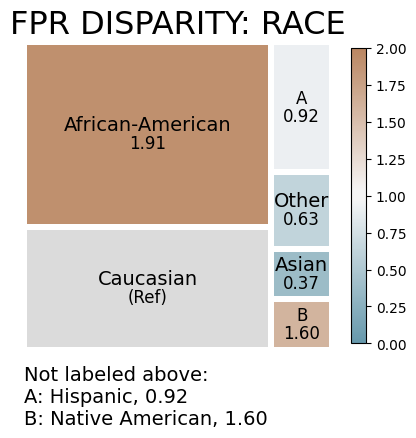

In [33]:
aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='race', significance_alpha=0.05)

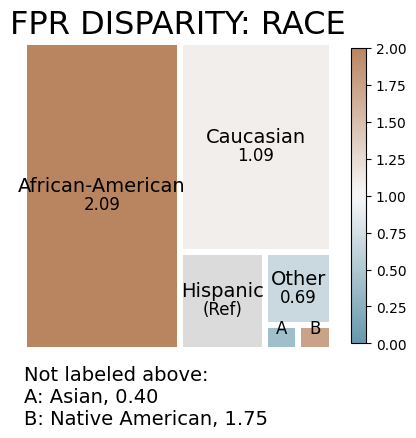

In [34]:
aqp.plot_disparity(hbdf, group_metric='fpr_disparity', attribute_name='race', significance_alpha=0.05)

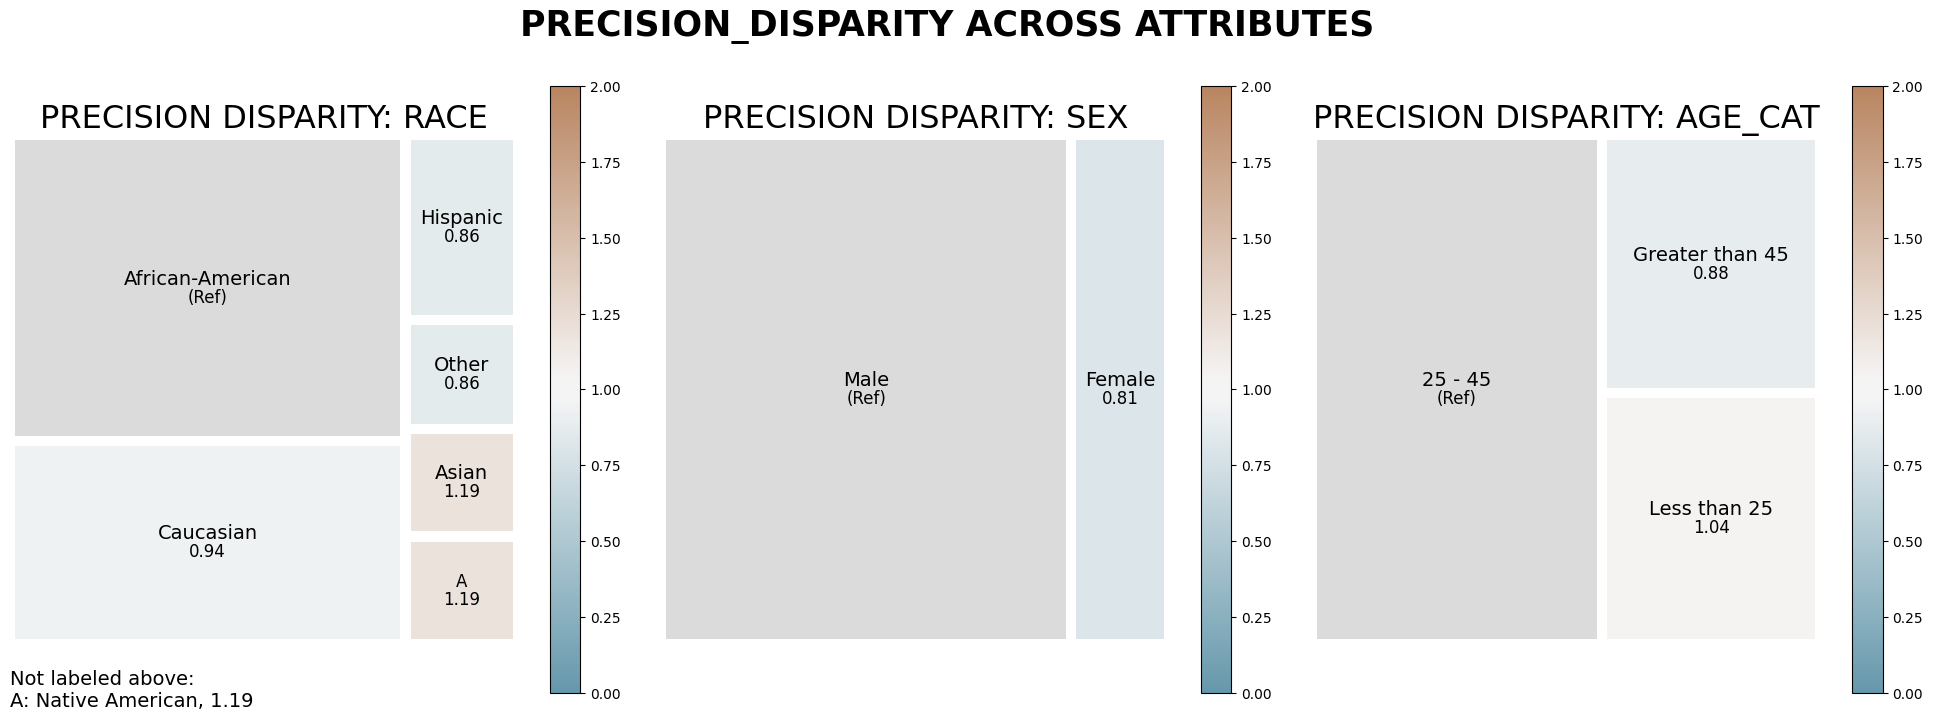

In [35]:
j = aqp.plot_disparity_all(majority_bdf, metrics=['precision_disparity'], significance_alpha=0.05)

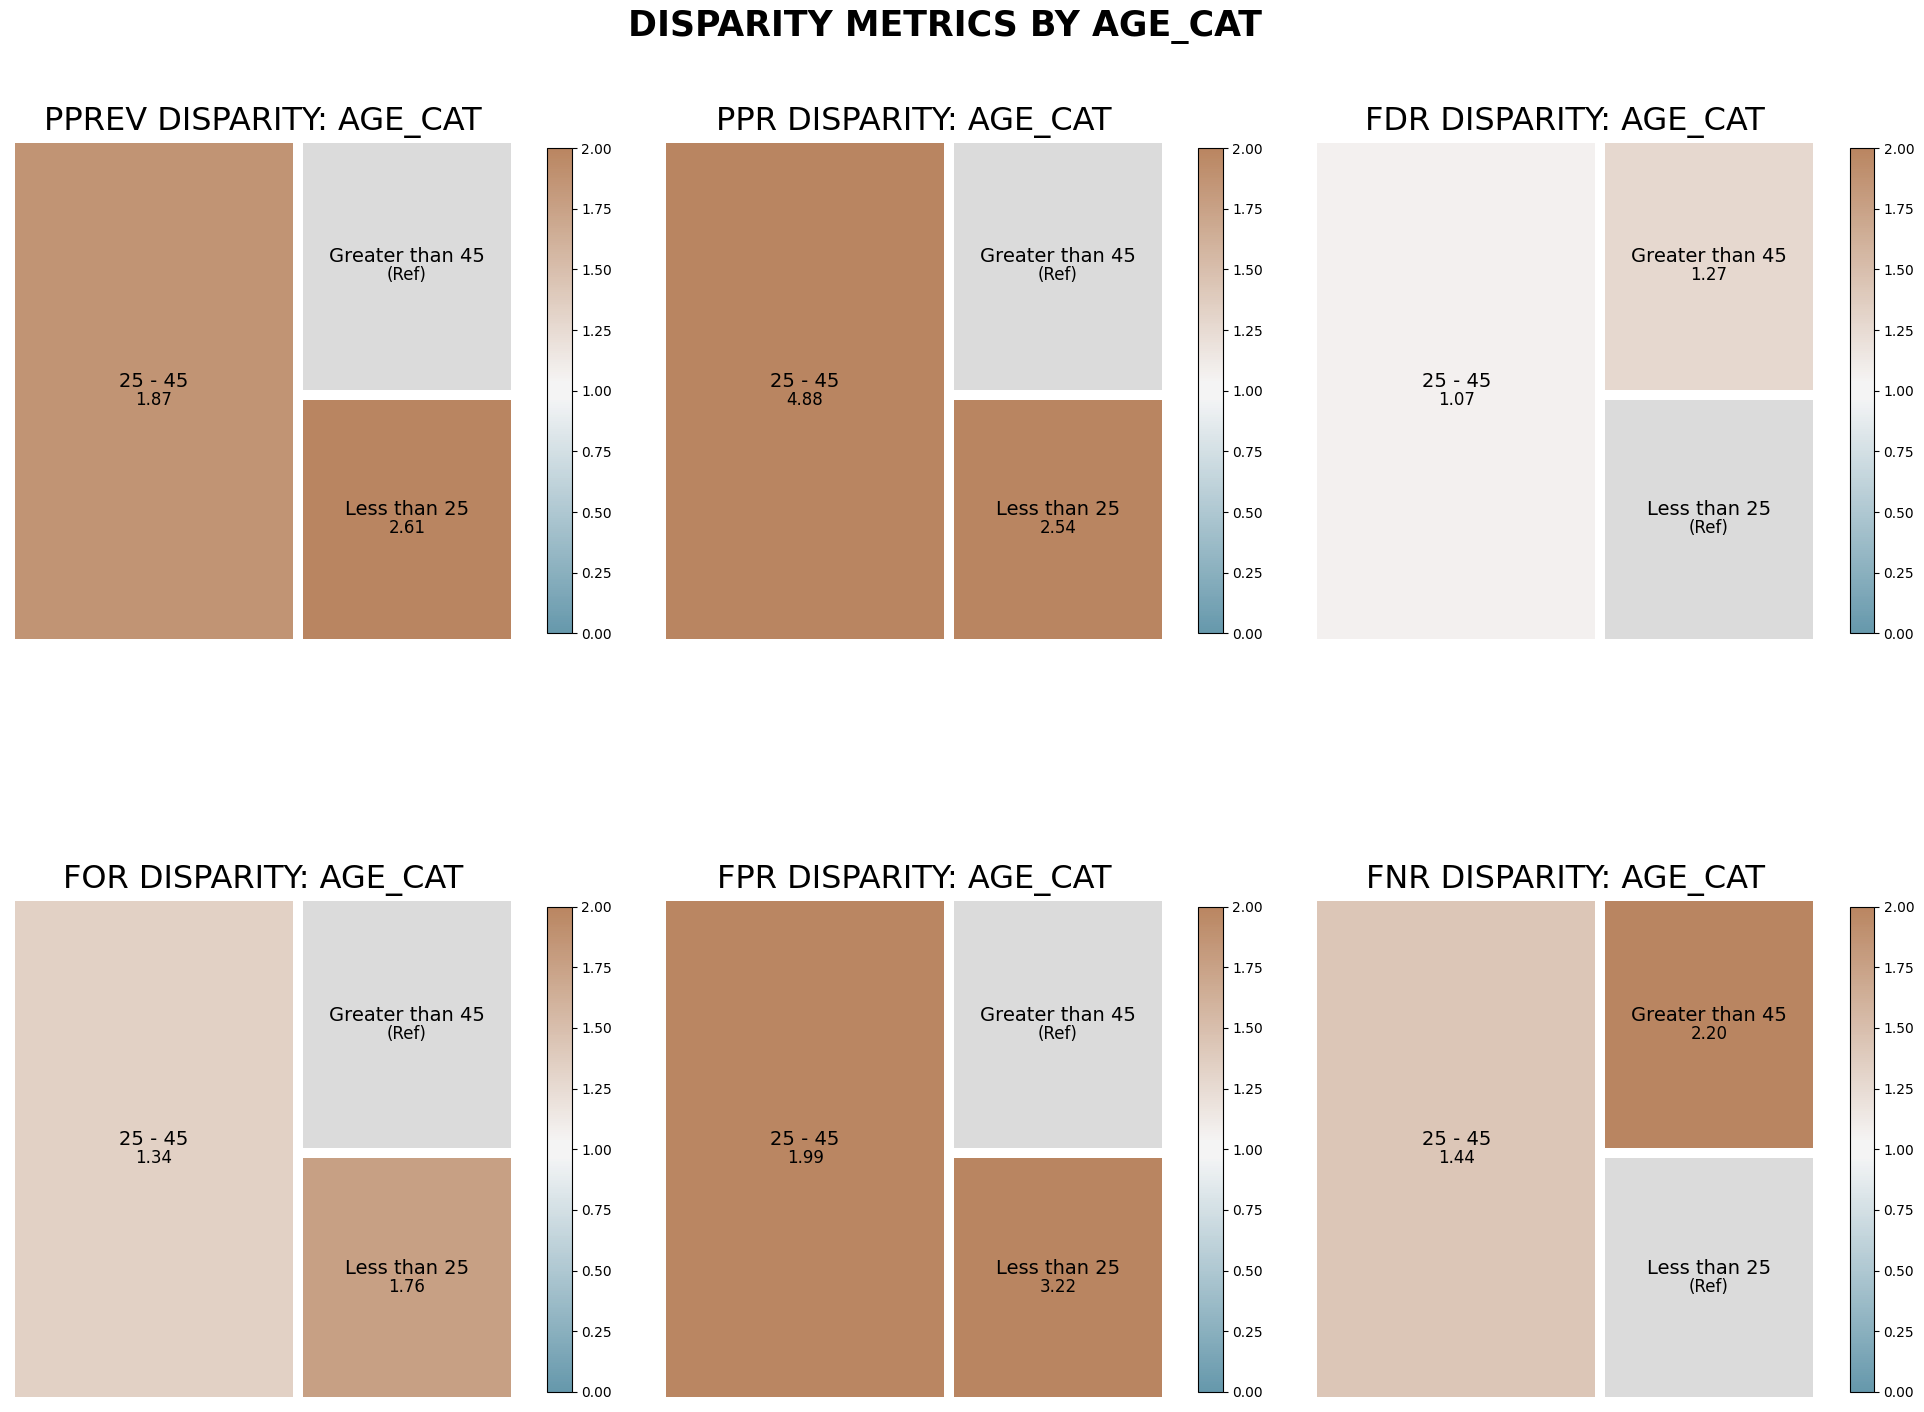

In [36]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['age_cat'], significance_alpha=0.05)

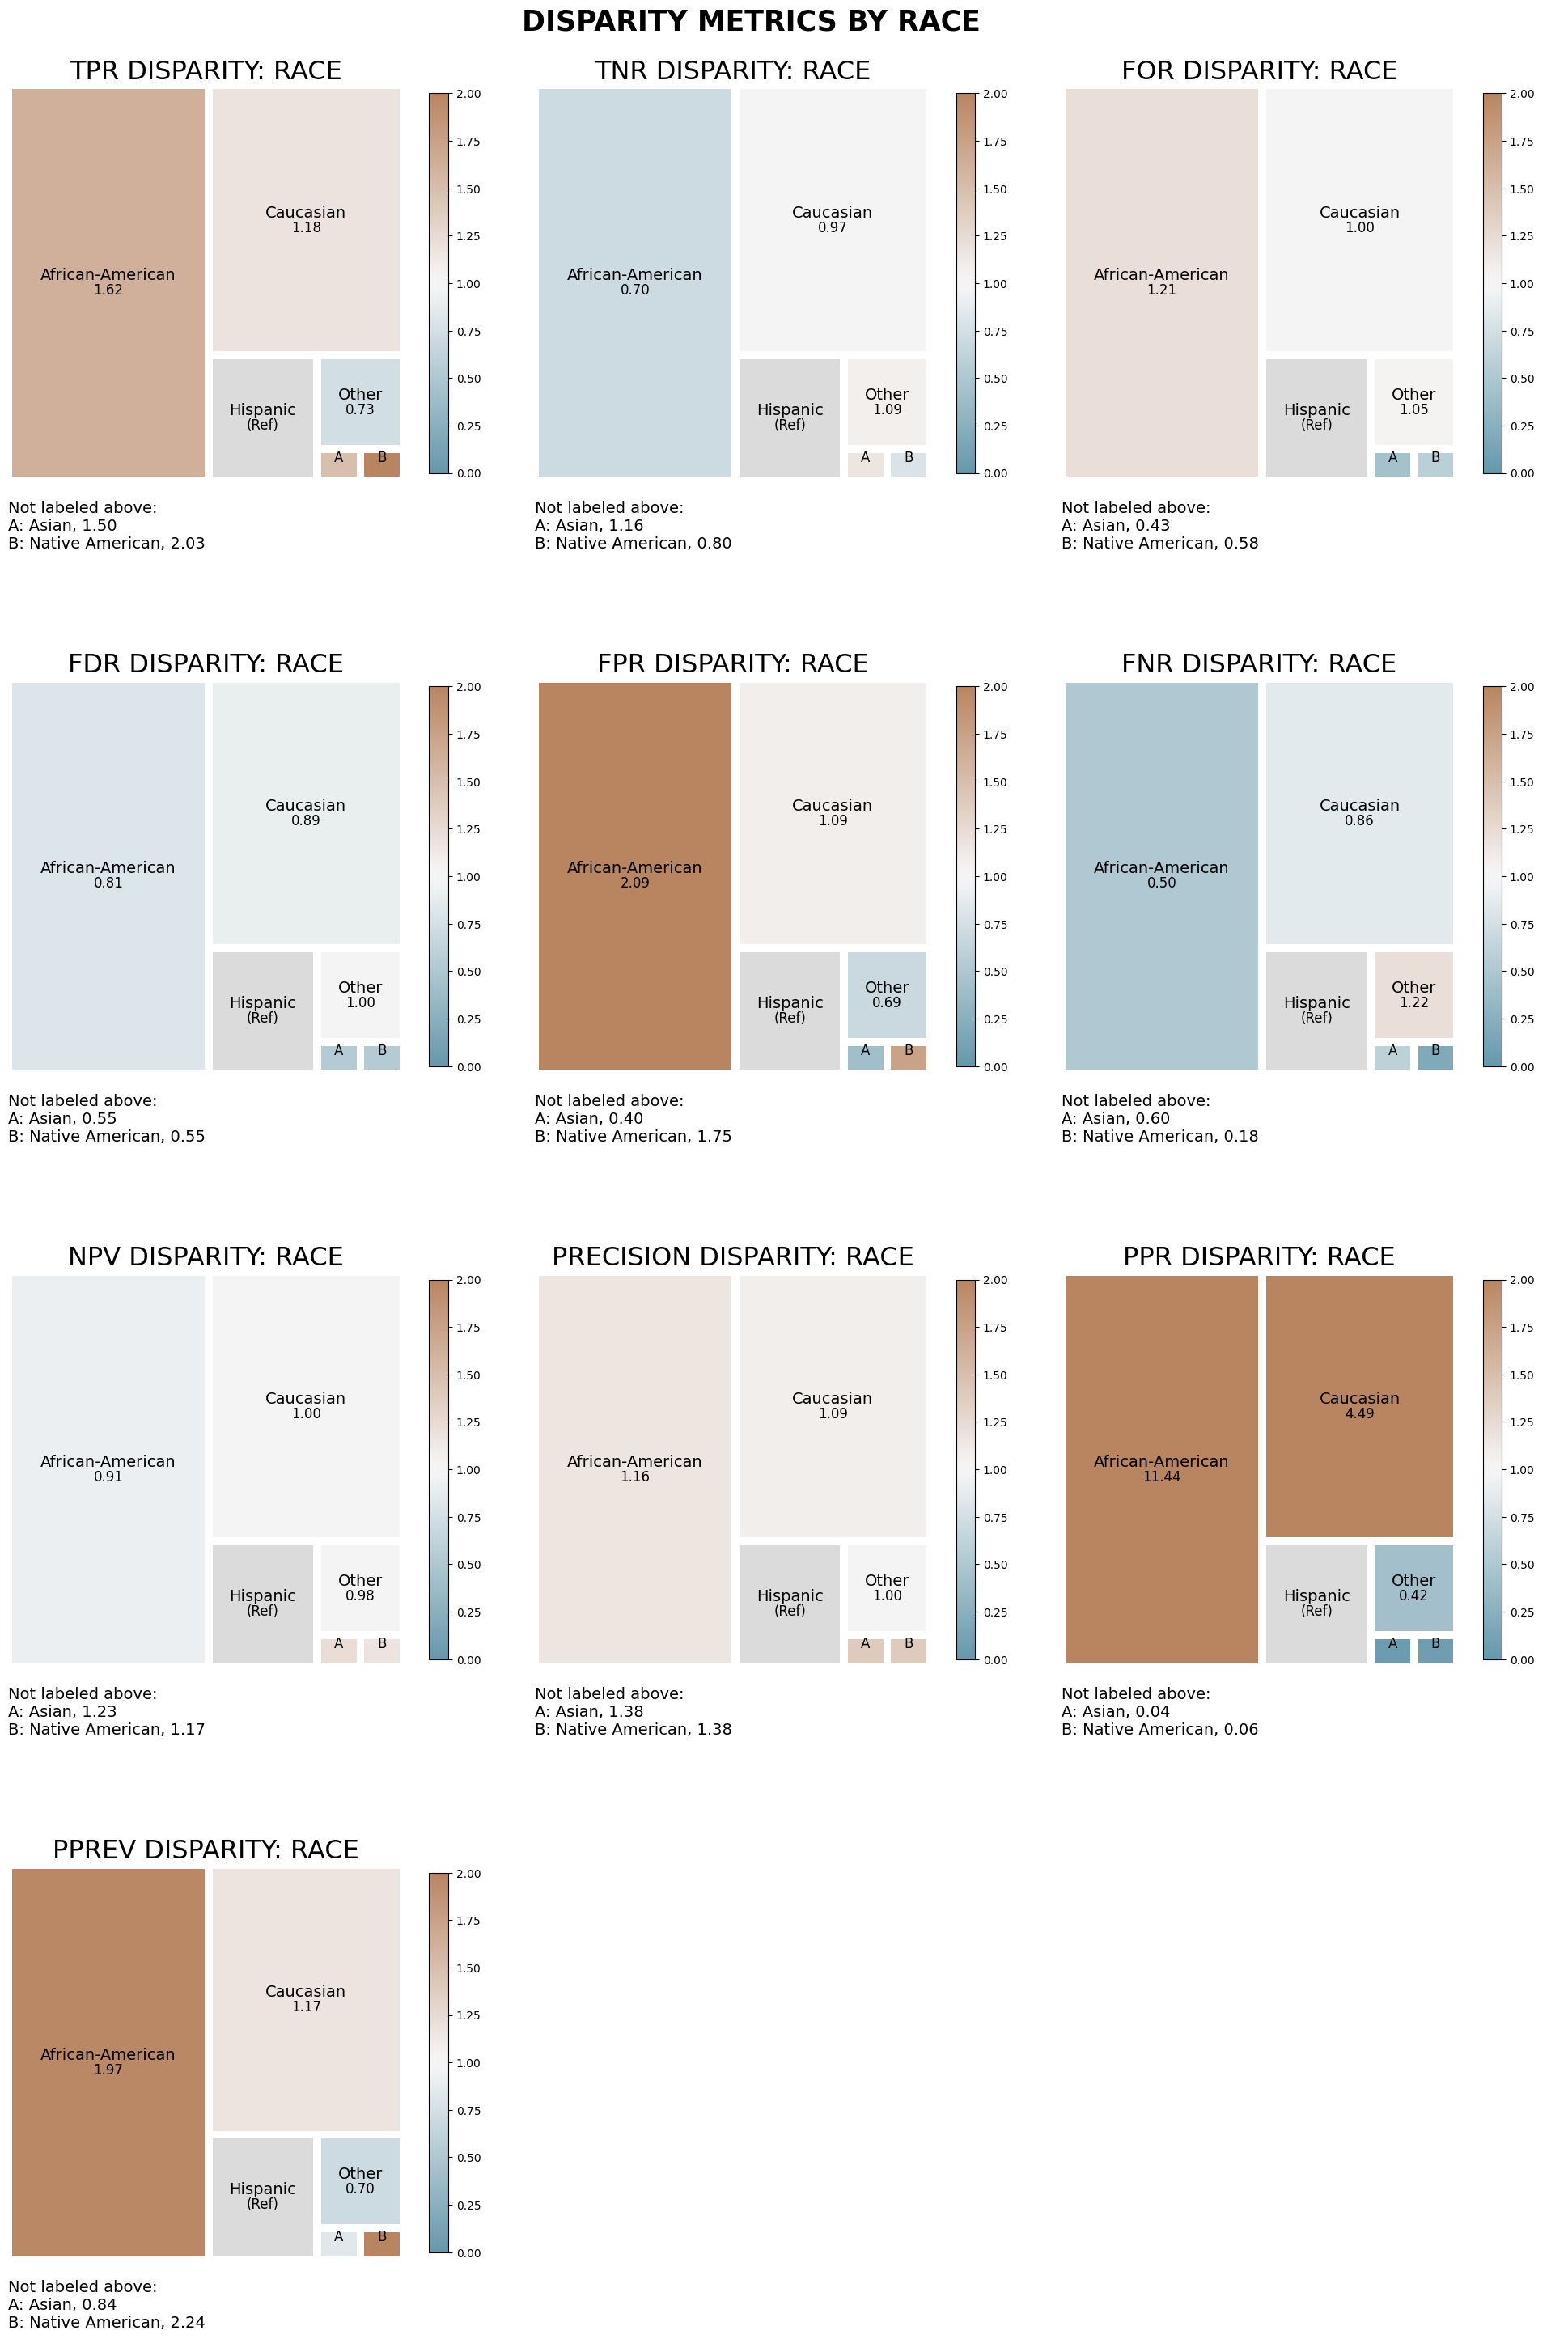

In [37]:
tm_capped = aqp.plot_disparity_all(hbdf, attributes=['race'], metrics = 'all', significance_alpha=0.05)


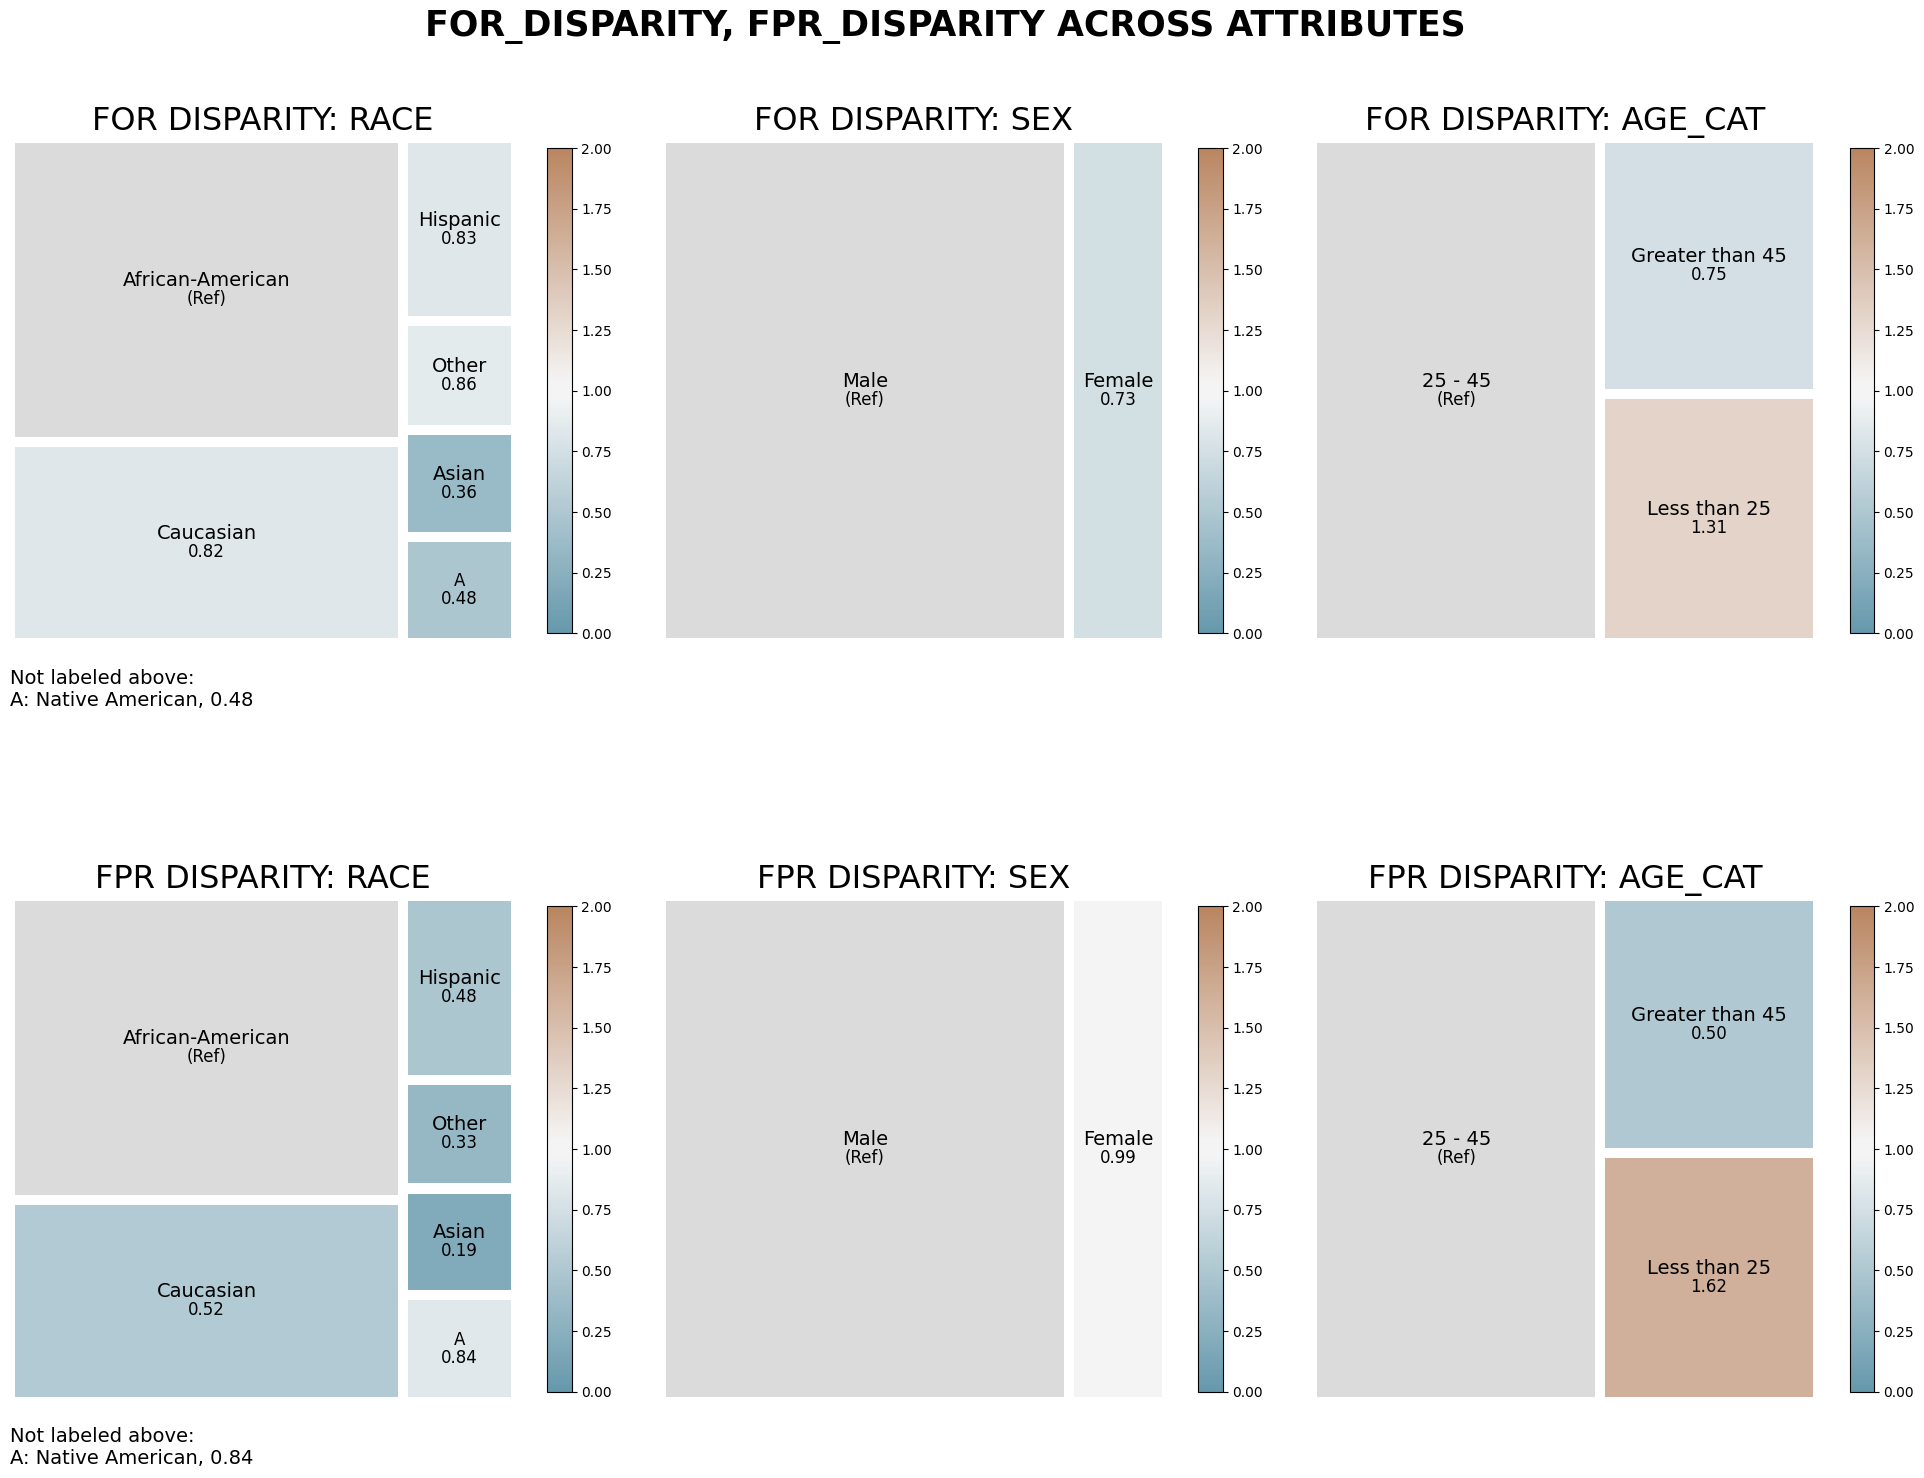

In [38]:
dp = aqp.plot_disparity_all(majority_bdf, metrics=['for_disparity', 'fpr_disparity'], significance_alpha=0.05)

In [39]:

f = Fairness()
fdf = f.get_group_value_fairness(bdf)

In [40]:
parity_detrminations = f.list_parities(fdf)

In [41]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + calculated_disparities + parity_detrminations].style


,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,TypeI Parity,Unsupervised Fairness,Statistical Parity,FDR Parity,FNR Parity,TNR Parity,FPR Parity,NPV Parity,Equalized Odds,TPR Parity,Precision Parity,Supervised Fairness,FOR Parity,TypeII Parity,Impact Parity
0,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,0.655412,0.588203,0.514340,2.545667,1.690224,1.064904,0.906085,1.213154,1.912093,0.586416,1.377549,0.720526,0.913728,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False
1,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,0.002412,0.250000,0.281250,0.009368,0.718384,1.268317,0.611748,0.433839,0.370749,0.698482,1.275248,1.192808,1.229148,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
2,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,0.257462,0.348003,0.393643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,0.057281,0.298273,0.364207,0.222482,0.857099,0.916748,1.120464,1.001616,0.915887,1.165140,0.849249,1.025773,0.999346,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True
4,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,0.003618,0.666667,0.555556,0.014052,1.915691,1.268317,0.611748,0.578453,1.598854,0.209544,1.721584,0.816506,1.170618,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
5,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,0.023817,0.209549,0.352785,0.092506,0.602147,0.920466,1.115085,1.048203,0.629057,1.417970,0.618447,1.113660,0.980490,False,False,False,True,False,True,False,True,False,False,True,False,True,False,False
6,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,0.178173,0.423656,0.356989,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710,False,False,False,False,True,True,True,True,True,True,True,False,False,False,True
7,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,0.821827,0.468465,0.473105,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,age_cat,25 - 45,0.626257,0.666216,0.323112,0.385135,0.333784,0.373743,0.676888,0.614865,0.580042,0.468240,0.459723,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,age_cat,Greater than 45,0.427711,0.832096,0.241117,0.459391,0.167904,0.572289,0.758883,0.540609,0.118782,0.250000,0.315990,0.204782,0.533914,0.879232,1.192804,0.746232,0.503031,1.531238,0.682963,1.248989,1.121136,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False


In [43]:
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,age_cat,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False
1,0,binary 0/1,race,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,0,binary 0/1,sex,False,True,False,True,False,True,True,True,True,True,False,False,True,False,False


In [44]:
gof = f.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

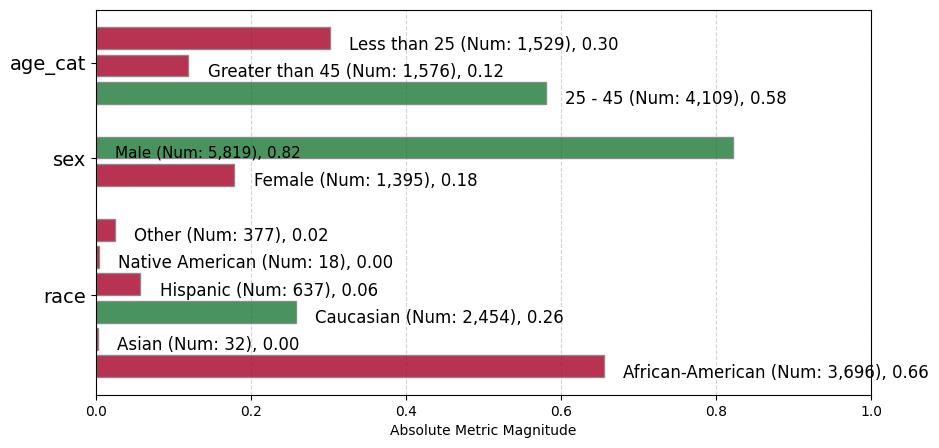

In [45]:

z = aqp.plot_fairness_group(fdf, group_metric='ppr')

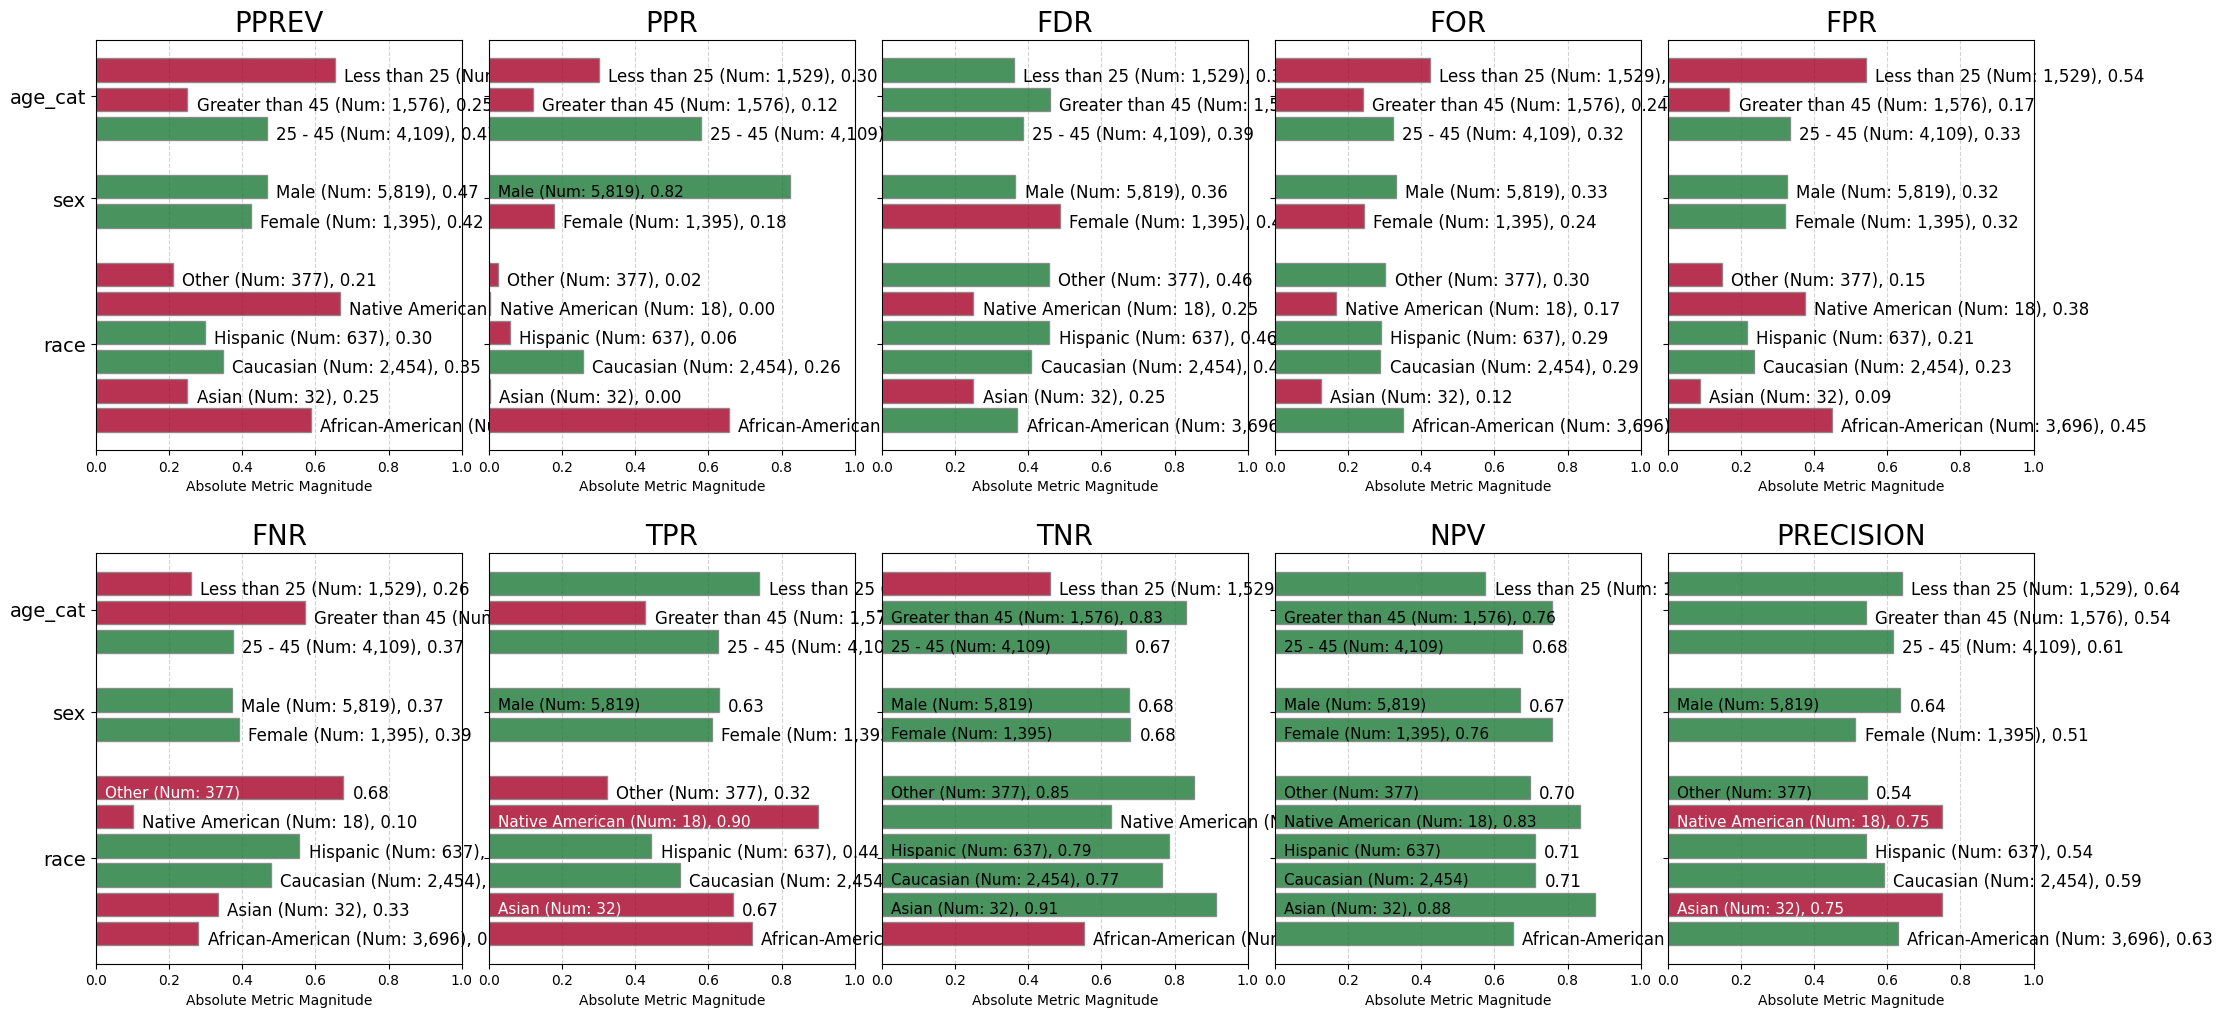

<Figure size 640x480 with 0 Axes>

In [46]:

fg = aqp.plot_fairness_group_all(fdf, ncols=5, metrics = "all")

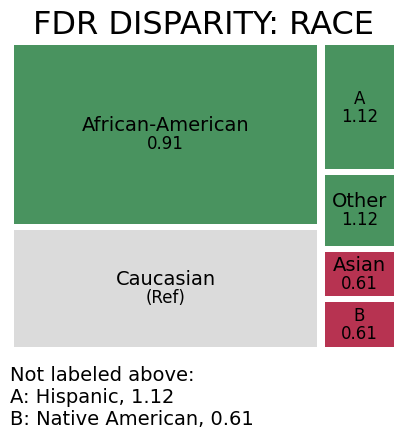

In [47]:
m = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='race')

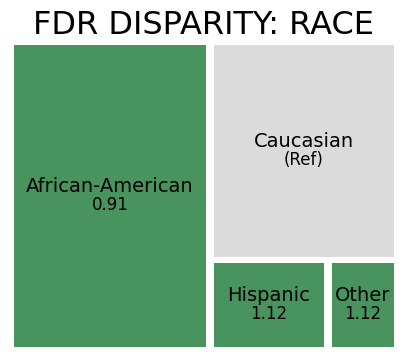

In [48]:
m = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='race',
                                min_group_size=0.01, significance_alpha=0.05)

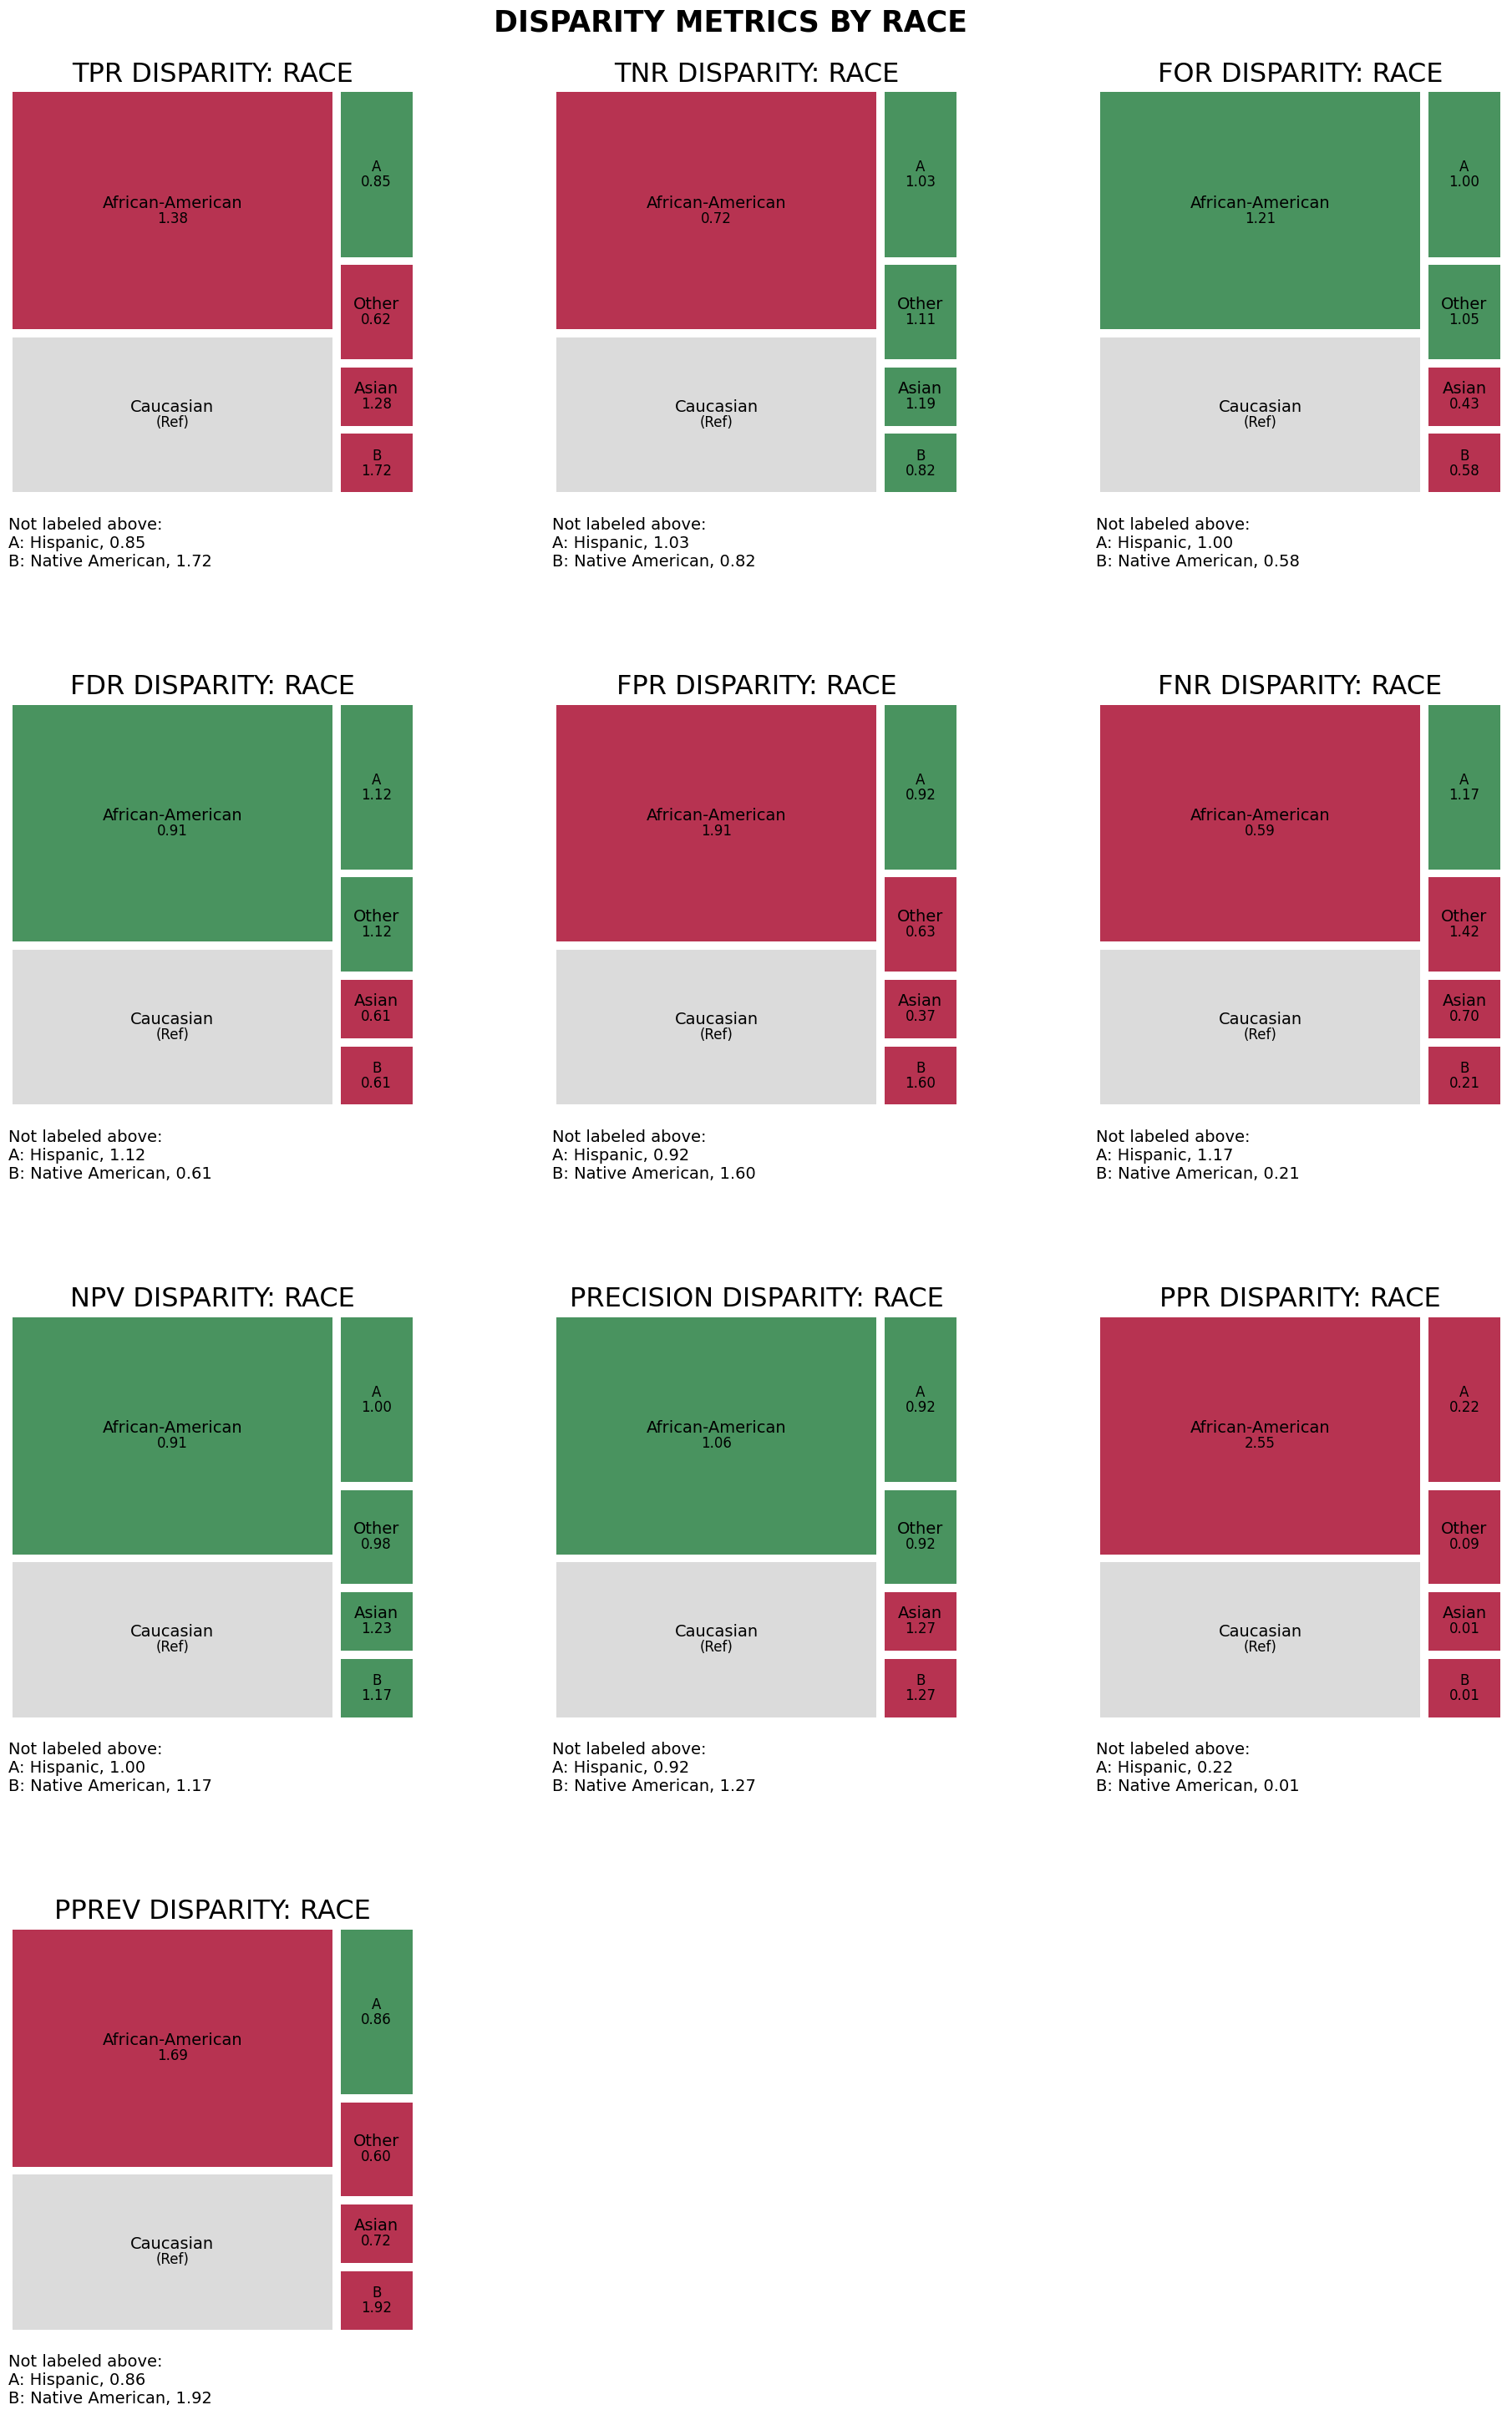

In [49]:

a_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['race'], metrics='all',
                                       significance_alpha=0.05)


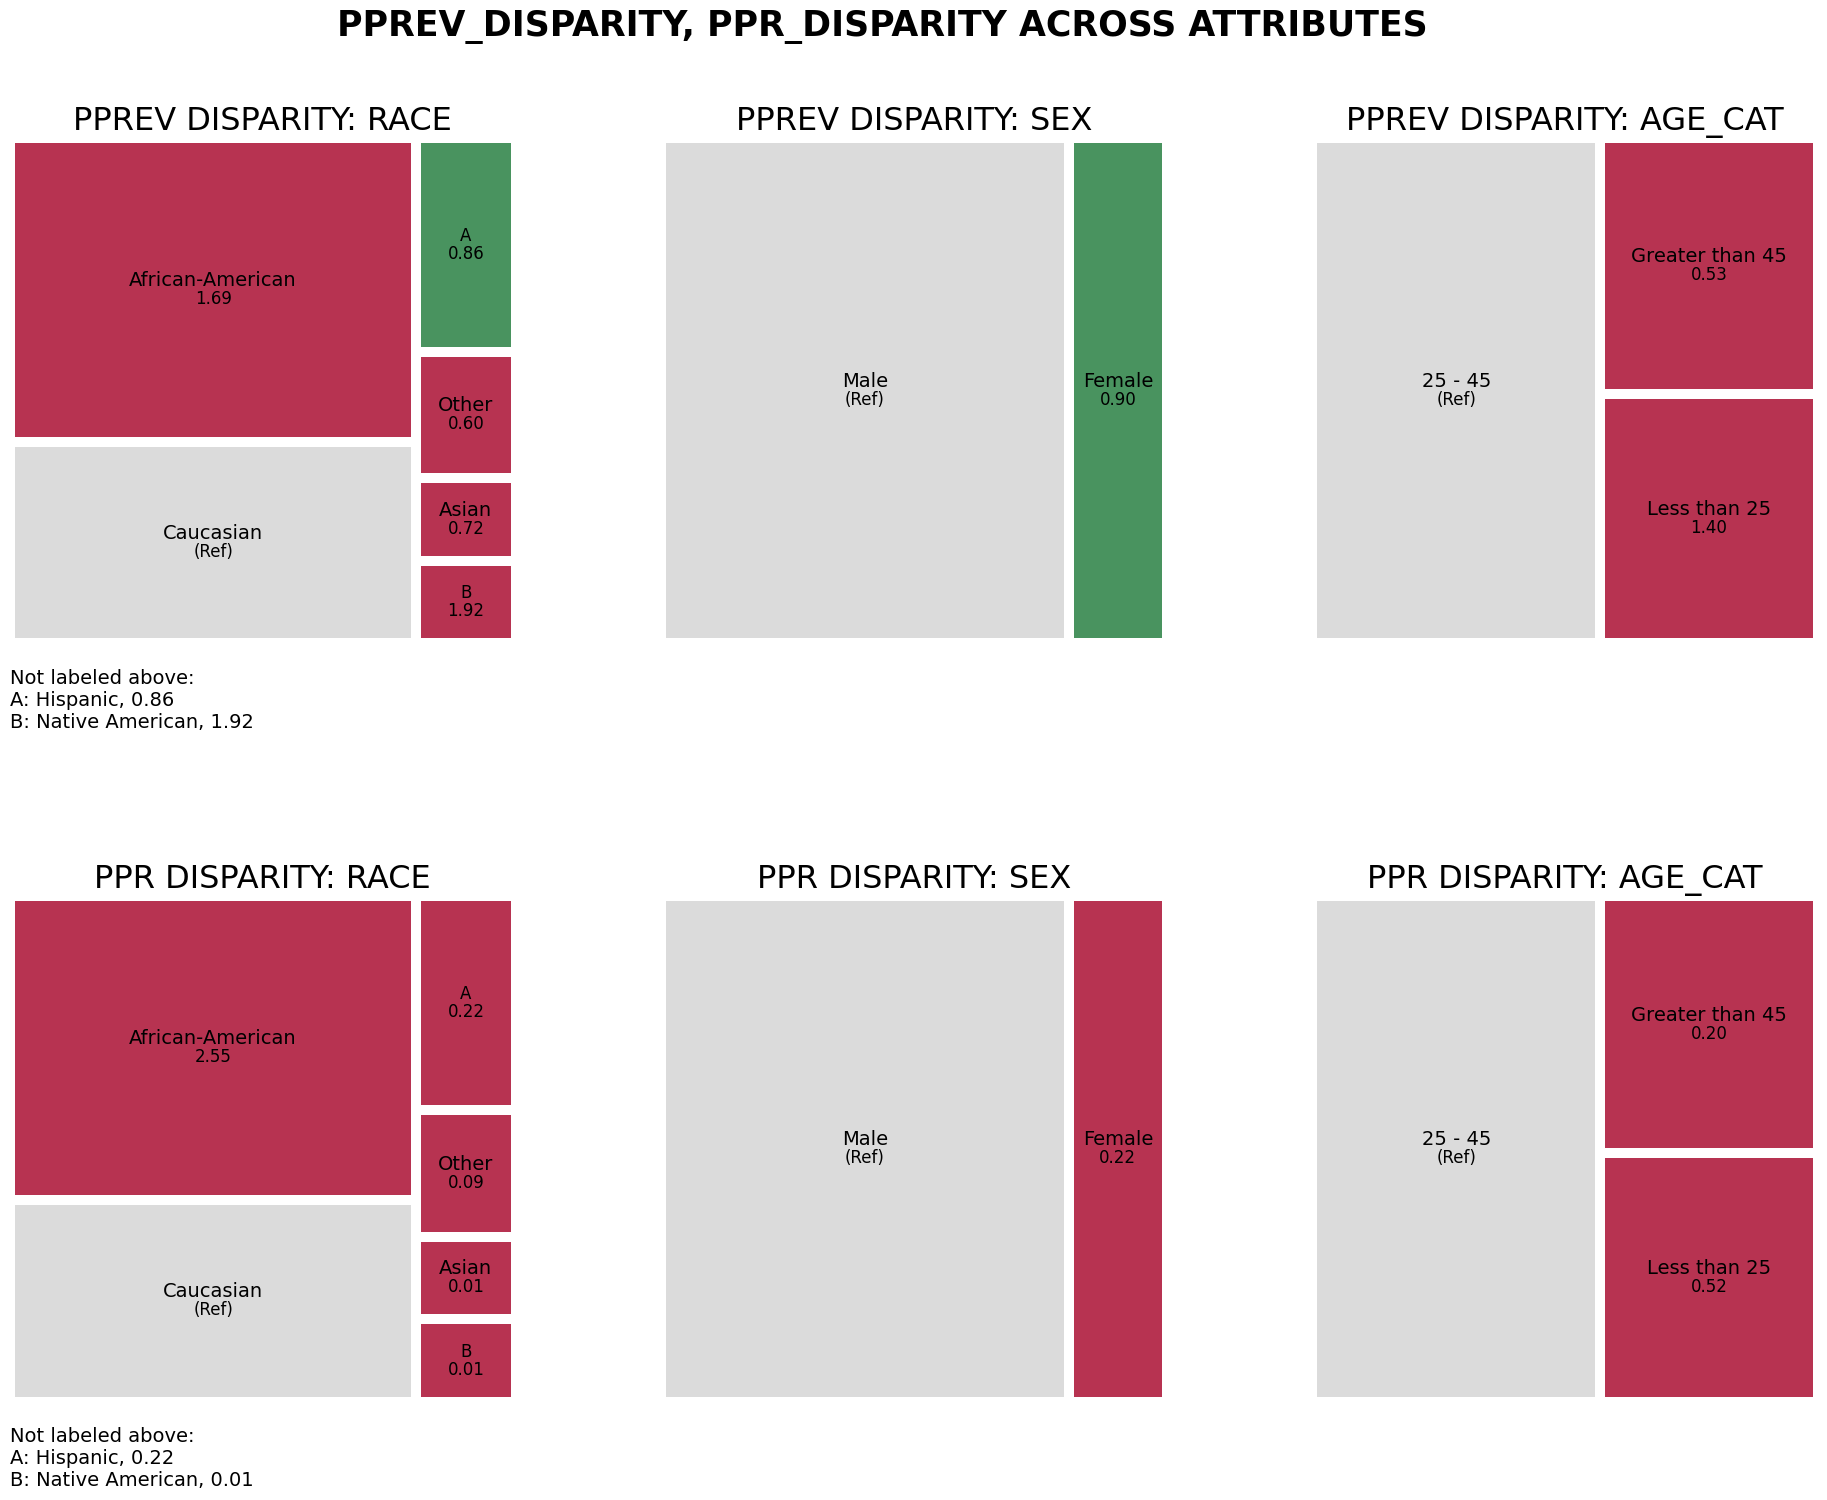

In [50]:
r_tm = aqp.plot_fairness_disparity_all(fdf, metrics=['pprev_disparity', 'ppr_disparity'],
                                       significance_alpha=0.05)


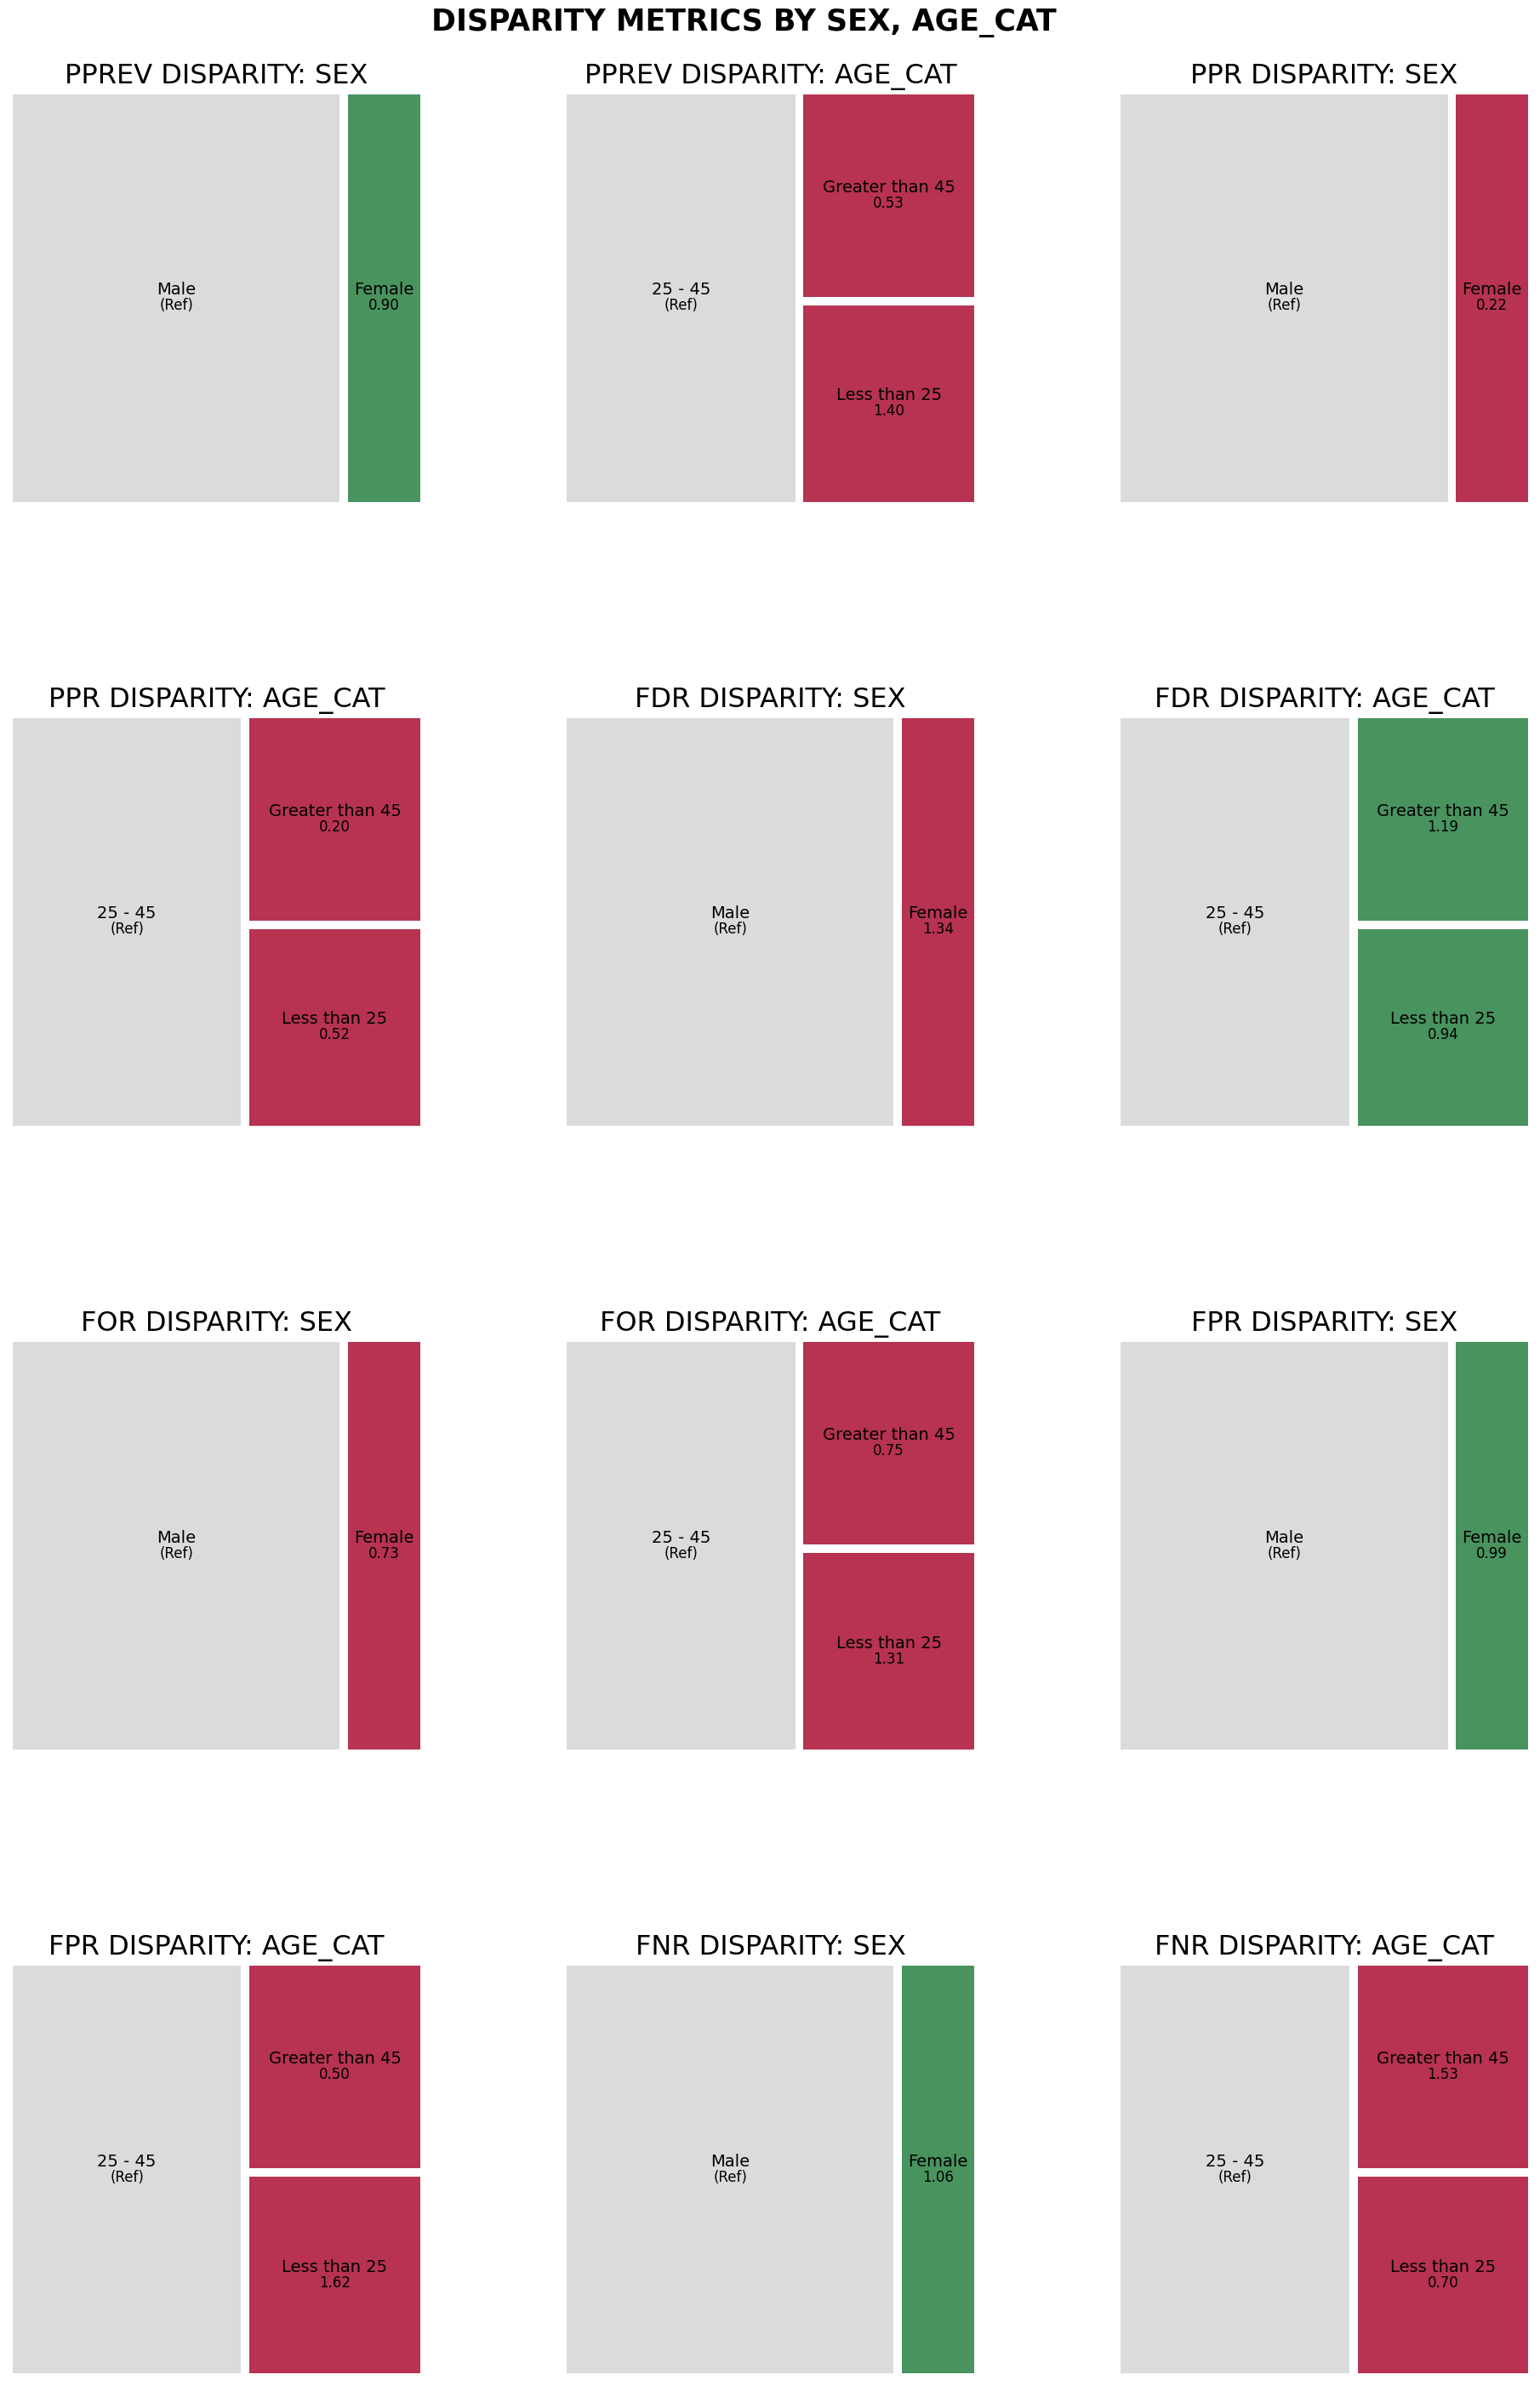

In [51]:

n_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['sex', 'age_cat'],
                                       significance_alpha=0.05)